In [1]:
import os
import glob
import imageio
import random, shutil
import torch
import torch.nn as nn
from tqdm.notebook import tqdm
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import librosa
import librosa.display

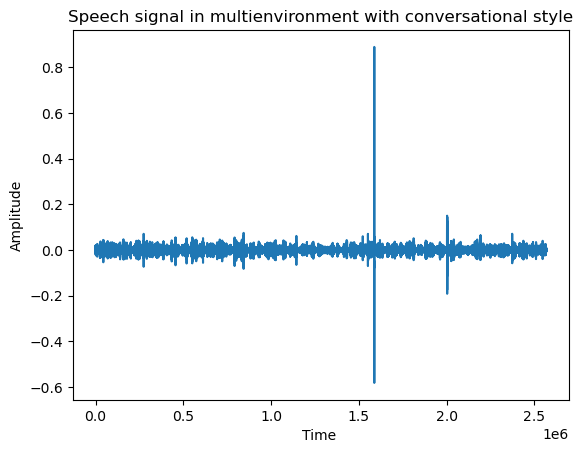

In [4]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
y, sr = librosa.load('/kaggle/input/iit-mv-3d-logmel-of-one-speech-sample/1013_AD01MENC.wav',sr= 16000)
plt.plot(y);
plt.title('Speech signal in multienvironment with conversational style');
#plt.title('Speech Signal in multi environment with recording Style');
plt.xlabel('Time ');
plt.ylabel('Amplitude');

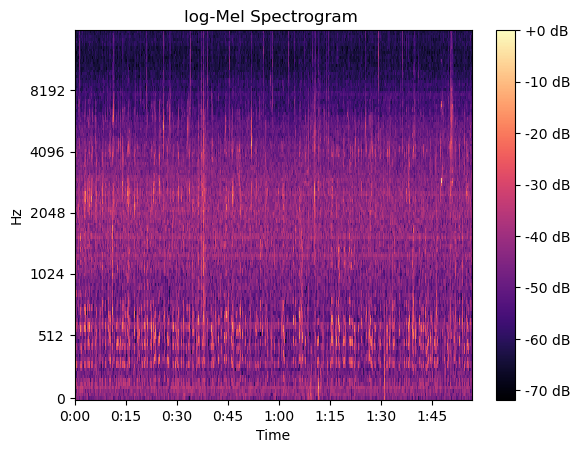

In [5]:
spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=1024, hop_length=512)
mel_spect = librosa.power_to_db(spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=16000, x_axis='time');
#plt.title('Mel Spectrogram of Speech Signal in multienvironment with Conversational Style');
plt.title('log-Mel Spectrogram ');
plt.colorbar(format='%+2.0f dB');

In [6]:
mfcc_delta = librosa.feature.delta(mel_spect)

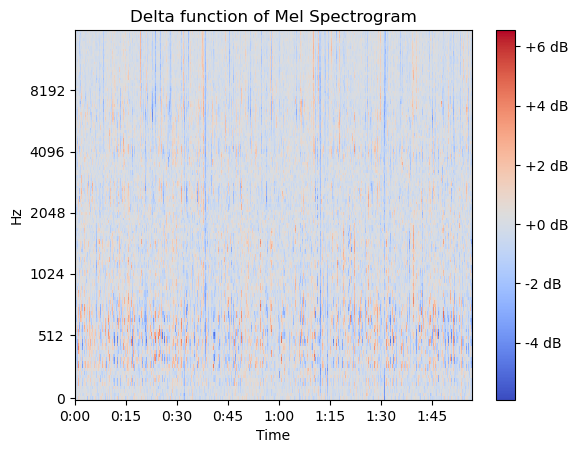

In [7]:
librosa.display.specshow(mfcc_delta, y_axis='mel', fmax=16000, x_axis='time');
#plt.title('Delta function of Mel Spectrogram of Speech Signal of Conversational Style-II ');
plt.title('Delta function of Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [8]:
mfcc_delta2 = librosa.feature.delta(mel_spect, order=2)

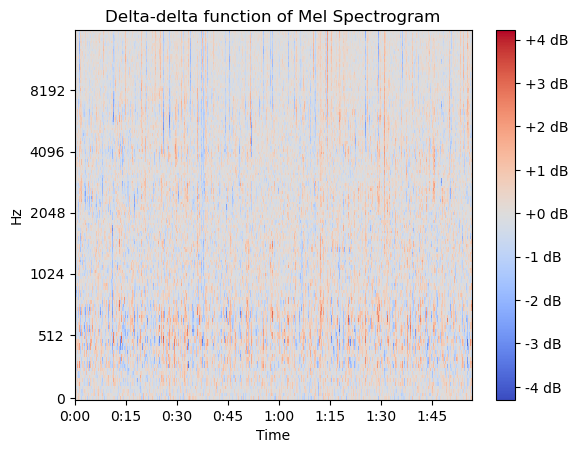

In [9]:
librosa.display.specshow(mfcc_delta2, y_axis='mel', fmax=16000, x_axis='time');
#plt.title('Delta function of Mel Spectrogram of Speech Signal of Conversational Style-II ');
plt.title('Delta-delta function of Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');

In [10]:
feature = np.stack((mel_spect,mfcc_delta,mfcc_delta2), 
                             axis=0)

In [12]:
Features = []

In [13]:
  feature = librosa.power_to_db(feature, ref=np.max)
  Features.append(feature)
    #print ('feature',feature.shape)
print ('Features',len(Features) )

Features 1


In [14]:
print ('feature.shape',feature.shape)

feature.shape (3, 128, 5017)
